In [7]:
import requests

def get_weather_data(api_key, city_id):
    api_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "id": city_id,
        "units": "metric",
        "appid": api_key
    }
    response = requests.get(api_url, params=params)
    data = response.json()
    return data

api_key = "5a5dc4c0a633d9df1f1fd24f47b52ea0"
city_id = "1259931"
weather_data = get_weather_data(api_key, city_id)

print(f"City: {weather_data['name']}")
print(f"Temperature: {weather_data['main']['temp']}°C")

City: Pen
Temperature: 29.02°C


In [8]:
def estimate_solar_power(cloud_cover, panel_area=1.0, efficiency=0.2):
    # Estimate solar radiation based on cloud cover
    solar_radiation = (1 - cloud_cover / 100) * 1000  # W/m^2
    # Power = Radiation * Area * Efficiency
    power = solar_radiation * panel_area * efficiency  # W
    return power

def estimate_wind_power(wind_speed, turbine_area=1.0, efficiency=0.4):
    # Power = 0.5 * air_density * area * wind_speed^3 * efficiency
    air_density = 1.225  # kg/m^3
    power = 0.5 * air_density * turbine_area * (wind_speed ** 3) * efficiency  # W
    return power

def estimate_hydropower(flow_rate, head_height, efficiency=0.85):
    density_water = 1000  # kg/m^3
    g = 9.81  # m/s^2
    power = density_water * g * flow_rate * head_height * efficiency
    return power

if weather_data:
    # Extract data
    precipitation = 90 #weather_data.get("rain", {}).get("1h", 0)  # Rainfall in mm (last hour)
    wind_speed = weather_data["wind"]["speed"]  # Wind speed in m/s (example usage)
    
    # Approximate flow rate (based on rainfall; adjust based on location)
    # Example: 1 mm of rainfall over 1 km² = 1 cubic meter per second
    area = 5  # km² (catchment area for rainfall)
    flow_rate = (precipitation / 1000) * area * 1e6 / 3600  # Convert mm/hour to m³/s
    
    # Assume constant head height (example: 20 m)
    head_height = 100  # meters
    
    # Calculate hydropower
    hydropower = estimate_hydropower(flow_rate, head_height)
    
# def estimate_hydropower(flow_rate, head_height, efficiency=0.8):
#     # Power = Density * g * Flow rate * Head height * Efficiency
#     density_water = 1000  # kg/m^3 (density of water)
#     gravitational_constant = 9.81  # m/s^2 (acceleration due to gravity)
#     power = density_water * gravitational_constant * flow_rate * head_height * efficiency  # W
#     return power

# def estimate_tidal_wave_power(tidal_current_speed, tidal_area=1000, efficiency=0.5):
#     # Power = 0.5 * Density * Area * Speed^3 * Efficiency
#     density_seawater = 1025  # kg/m^3 (density of seawater)
#     power = 0.5 * density_seawater * tidal_area * (tidal_current_speed ** 3) * efficiency  # W
#     return power

cloud_cover = weather_data["clouds"]["all"]
wind_speed = weather_data["wind"]["speed"]

solar_power = estimate_solar_power(cloud_cover)
wind_power = estimate_wind_power(wind_speed)
hydropower = estimate_hydropower(flow_rate, head_height)

print(f"Cloud cover:{cloud_cover}\nWind Speed:{wind_speed}")

print(f"Power generation\nSolar Power: {solar_power}\nWind Power:{wind_power}\nHydropower: {hydropower / 1e6:.2f} MW")

Cloud cover:14
Wind Speed:3.59
Power generation
Solar Power: 172.0
Wind Power:11.335728355
Hydropower: 104.23 MW


Cloud Cover: 14%
Wind Speed: 3.59 m/s
Power Generation:
  Solar Power: 172.00 W
  Wind Power: 11.34 W
  Hydropower: 104.23 MW


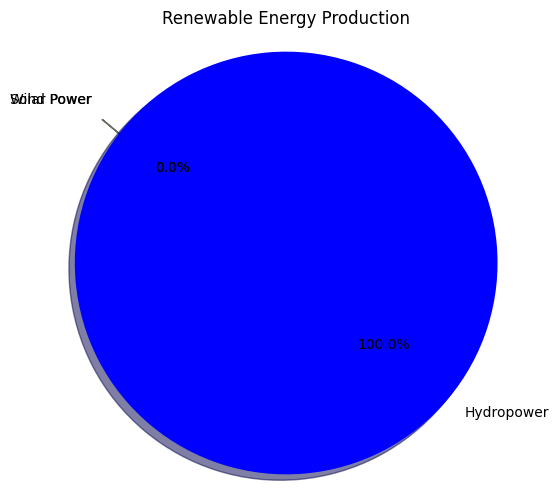

In [9]:
import matplotlib.pyplot as plt

if weather_data:
    # Extract data
    precipitation = 90 #weather_data.get("rain", {}).get("1h", 0)  # Rainfall in mm (last hour)
    wind_speed = weather_data["wind"]["speed"]  # Wind speed in m/s (example usage)
    
    # Approximate flow rate (based on rainfall; adjust based on location)
    # Example: 1 mm of rainfall over 1 km² = 1 cubic meter per second
    area = 5  # km² (catchment area for rainfall)
    flow_rate = (precipitation / 1000) * area * 1e6 / 3600  # Convert mm/hour to m³/s
    
    # Assume constant head height (example: 20 m)
    head_height = 100  # meters
    
    # Calculate hydropower
    hydropower = estimate_hydropower(flow_rate, head_height)

# Extract data

# Approximate flow rate (based on rainfall; adjust based on location)
area = 5  # km² (catchment area for rainfall)
flow_rate = (precipitation / 1000) * area * 1e6 / 3600  # Convert mm/hour to m³/s

# Assume constant head height (example: 100 m)
head_height = 100  # meters

# Calculate power generation
solar_power = estimate_solar_power(cloud_cover)
wind_power = estimate_wind_power(wind_speed)
hydropower = estimate_hydropower(flow_rate, head_height)

# Print results
print(f"Cloud Cover: {cloud_cover}%")
print(f"Wind Speed: {wind_speed} m/s")
print(f"Power Generation:")
print(f"  Solar Power: {solar_power:.2f} W")
print(f"  Wind Power: {wind_power:.2f} W")
print(f"  Hydropower: {hydropower / 1e6:.2f} MW")

# Plot the renewable energy production
labels = ['Solar Power', 'Wind Power', 'Hydropower']
sizes = [solar_power, wind_power, hydropower]  # Use actual calculated values
colors = ['gold', 'lightskyblue', 'blue']
explode = (0.1, 0.1, 0)  # Explode 1st and 2nd slices

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Renewable Energy Production')
plt.show()


Precipitation: 0 mm
Wind Speed: 3.59 m/s
Cloud Cover: 14%
Power generation:
  Solar Power: 172.00 W
  Wind Power: 11.34 W
  Hydropower: 0.00 MW
No optimal solution found.


NameError: name 'optimal_solar_power' is not defined

: 